In [1]:
import os
from zipfile import ZipFile

# 1. Install Kaggle
!pip install -q kaggle

# 2. Set your credentials
# REPLACE "YOUR_USERNAME_HERE" with your actual Kaggle username
os.environ['KAGGLE_USERNAME'] = "shaguns26"

# This is the token you shared
os.environ['KAGGLE_KEY'] = ""

# 3. Download the dataset
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

# 4. Unzip the file (Important step!)
!unzip -q plantvillage-dataset.zip

# 5. Verify it worked
!ls

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 98% 2.00G/2.04G [00:23<00:00, 40.9MB/s]
100% 2.04G/2.04G [00:23<00:00, 94.3MB/s]
'plantvillage dataset'	 plantvillage-dataset.zip   sample_data


In [2]:

print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

['grayscale', 'segmented', 'color']
38
['Potato___healthy', 'Corn_(maize)___Common_rust_', 'Grape___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus']
38
['Potato___healthy', 'Corn_(maize)___Common_rust_', 'Grape___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus']
38
['Potato___healthy', 'Corn_(maize)___Common_rust_', 'Grape___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus']
423
['369f23fe-c093-4655-a9f2-0aae0918eb26___Mt.N.V_HL 6102.JPG', 'd36e68e3-09bf-4249-96cc-d806c55bfeed___Mt.N.V_HL 9048.JPG', 'ac753212-e6d7-44b9-9722-4413a7418ab3___Mt.N.V_HL 6178.JPG', '4b472308-dde6-41b2-943e-707eb5b4b050___Mt.N.V_HL 8942.JPG', 'eaf9de03-6ec6-453b-9cd1-38d5d3337ea3___Mt.N.V_HL 8951.JPG']


In [4]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import os
from PIL import Image
from collections import Counter

This is a great question. In Machine Learning, "Transformer" usually refers to a specific type of massive model (like the "T" in GPT), but in this specific code block, **`transforms` means something completely different.**

Here is the breakdown of why this code exists and what it is doing to your images.

### 1. The "Why": Computers can't see "Images"
When you load a JPEG or PNG file, it is just a grid of colored pixels. To a computer using Python (specifically the PIL library), an image is a collection of integers usually ranging from **0 to 255**.

However, PyTorch (your deep learning framework) **cannot** learn from integers or standard image files. It requires:
1.  **Floats:** Numbers between 0.0 and 1.0 (usually).
2.  **Tensors:** A specific data structure that can live on the GPU.
3.  **Channel-First Format:** PyTorch wants dimensions to be `(Channels, Height, Width)`, whereas standard images are usually `(Height, Width, Channels)`.

The `transform` is the bridge that converts the "Image" into "Math" that the model can consume.

---

### 2. The Code Explained
Let's look at the two specific pieces you asked about:

#### A. `transforms.Compose([...])`
Think of this as a **Conveyor Belt** or a **Pipeline**.
You rarely do just one thing to an image. Usually, you want to:
1.  Resize it.
2.  Rotate it (for data augmentation).
3.  Convert it to a Tensor.

`Compose` bundles these steps together. It tells PyTorch: *"When you load an image, run it through this list of steps in this exact order."*

#### B. `transforms.ToTensor()`
This is the specific worker on the conveyor belt. It does three critical jobs automatically:
1.  **Converts format:** Changes the image from a PIL Image / NumPy array into a PyTorch Tensor.
2.  **Scales values:** It takes the pixel values (which are 0 to 255) and divides them by 255. This squishes all the data to be between **0.0 and 1.0**. Neural networks learn *much* faster with small numbers like 0-1 than large ones like 0-255.
3.  **Rearranges dimensions:**
    * Standard Image: `(Height, Width, Color_Channels)`
    * PyTorch Tensor: `(Color_Channels, Height, Width)`

---

### 3. How do we expect it to work? (The Workflow)

When you run `dataset = datasets.ImageFolder(...)`, this is what happens behind the scenes every time your code asks for an image:

1.  **File Access:** The code finds a file, e.g., `potato_leaf.jpg`.
2.  **Load:** It loads the image. At this moment, it is a 256x256 pixel image with values like `[240, 10, 50]`.
3.  **The Transform Trigger:** Because you passed `transform=initial_transform`, PyTorch intercepts the image.
4.  **The Transformation:**
    * It divides every pixel by 255.
    * It moves the color channels to the front.
5.  **Output:** It hands you back a **Tensor**.

**Without this code:**
If you removed `transform=initial_transform`, the code would crash the moment you tried to train the model, because the model would say: *"I expect a Math Tensor, but you gave me a Picture Object."*

### Summary Visual

| Feature | Raw Image (Input) | After `transforms.ToTensor()` (Output) |
| :--- | :--- | :--- |
| **Data Type** | PIL Image / Integer | `torch.Tensor` / Float32 |
| **Range** | 0 to 255 | 0.0 to 1.0 |
| **Shape** | (256, 256, 3) | (3, 256, 256) |
| **Readable by?** | Human / Photo Viewer | **Your Neural Network** |

### Next Step for you
Since you are building a portfolio project, you will likely update this transform block later to add **Data Augmentation** (randomly flipping or rotating images) to make your model smarter. That is why we use `Compose`—so we can easily add those extra steps later!

In [6]:
dataset_path = "/content/plantvillage dataset/color"
# Define a basic transform just to convert images to tensors for the initial load
initial_transform = transforms.Compose([
    transforms.ToTensor()
])


Dataset ImageFolder
    Number of datapoints: 54305
    Root location: /content/plantvillage dataset/color
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
# Create the initial dataset object using ImageFolder
# This reads the directory structure automatically
dataset = datasets.ImageFolder(root=dataset_path, transform=initial_transform)

# Inspecting attributes (as done in the video)
print(f"Total samples: {len(dataset)}")
# dataset.classes gives class names
# dataset.class_to_idx gives the mapping of class names to integer labels
# dataset.samples gives a list of (path, label) tuples

Total samples: 54305


In [17]:
dataset.class_to_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [9]:
# ==========================================
# 2. Filtering Data (Apple and Potato only)
# ==========================================

new_samples = []
new_classes = []

# Iterate through all samples in the original dataset
for path, label in dataset.samples:
    # Check if the file path contains 'apple' or 'potato' (case insensitive)
    if 'apple' in path.lower() or 'potato' in path.lower():
        new_samples.append((path, label))

        # Get the class name for the current label
        class_name = dataset.classes[label]

        # Add to new_classes list if not already present
        if class_name not in new_classes:
            new_classes.append(class_name)

# Sort classes to ensure consistent ordering (optional but good practice)
new_classes.sort()

# Create a new mapping from class name to a new index (0 to N-1) Dictionary comprehension
new_class_to_idx = {class_name: idx for idx, class_name in enumerate(new_classes)}

print(f"Filtered Classes: {new_classes}")
print(f"New Class to Index Mapping: {new_class_to_idx}")

Filtered Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
New Class to Index Mapping: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Potato___Early_blight': 4, 'Potato___Late_blight': 5, 'Potato___healthy': 6}


In [11]:
# ==========================================
# 3. Updating Labels in New Samples
# ==========================================

# The labels in 'new_samples' are still the old indices (e.g., 21, 22).
# We need to update them to the new indices (0, 1, 2...) based on new_class_to_idx.

final_samples = []

for path, old_label in new_samples:
    # Retrieve the class name using the old label
    original_class_name = dataset.classes[old_label]

    # Find the new label index for this class name
    new_label = new_class_to_idx[original_class_name]

    # Append the path and the NEW label
    final_samples.append((path, new_label))

# Verify the distribution of the new labels
labels_only = [label for path, label in final_samples]
print(f"Label Distribution: {Counter(labels_only)}")

Label Distribution: Counter({3: 1645, 4: 1000, 5: 1000, 0: 630, 1: 621, 2: 275, 6: 152})


This code is the **bridge** between your raw data (files on a disk) and PyTorch (the model that needs to learn).

In Python, this is called a **Custom Class**. Think of a Class as a **Blueprint**.

  * **The Blueprint:** `CustomDataset` (The instructions on how to handle data).
  * **The Object:** `custom_dataset` (The actual machine you build using the blueprint that holds your specific Apple/Potato data).

Here is the breakdown of the Python logic and how it handles the list `final_samples` you created earlier.

-----

### 1\. `class CustomDataset(Dataset):`

**The Logic:**
This tells Python: "I am creating a new type of object called `CustomDataset`, and it inherits from PyTorch's standard `Dataset`."

  * **Why inherit?** PyTorch has a "DataLoader" that feeds images to your AI. The DataLoader only talks to objects that follow the `Dataset` rules. By adding `(Dataset)`, you promise PyTorch: *"I follow the rules."*

-----

### 2\. `def __init__(self, ...):` (The Constructor)

**The Logic:**
This function runs **automatically** exactly once, the moment you create the object. It is the "Setup Phase."

  * **`self`**: This represents *this specific instance* of the object. When you say `self.samples = samples`, you are saying: *"Take the list you gave me, and save it in **my** internal pocket so I can reach it later."*

**Tying it back to your code:**
When you run this line later:

```python
# You created this list in the previous step
final_samples = [("path/to/apple.jpg", 0), ("path/to/potato.jpg", 1)...]

# You pass it into the init function here:
my_ds = CustomDataset(samples=final_samples, ...)
```

The `__init__` function grabs `final_samples` and stores it permanently inside `my_ds.samples`.

-----

### 3\. `def __len__(self):` (The Counter)

**The Logic:**
PyTorch needs to know: "How many images do I have total?" so it can calculate accuracy and progress bars.

  * It simply looks at the list you saved in `__init__` and counts it.

-----

### 4\. `def __getitem__(self, idx):` (The Worker)

**The Logic:**
This is the most critical function. It is a **Lazy Loader**.
It does **not** load 10,000 images into memory at once (which would crash your computer). It loads **only one** image when asked.

**How it works step-by-step:**

1.  **Input:** PyTorch asks for item number `idx` (e.g., Image \#5).
2.  **`self.samples[idx]`**: It goes to the list you saved in `__init__` and finds entry \#5.
      * *Result:* `("content/.../apple_leaf.jpg", 0)`
3.  **`Image.open(path)`**: It finds that file on your hard drive and opens it.
4.  **`self.transform(sample)`**: It applies the math (resize, normalize, convert to tensor) that we discussed earlier.
5.  **Return:** It hands back the ready-to-use Tensor and the Label.

**Analogy:**

  * **`__init__`** is the Librarian receiving the catalog (the list of where books are).
  * **`__getitem__`** is you asking the Librarian for "Book \#5." The Librarian walks to the shelf, grabs *only that book*, dusts it off (transform), and gives it to you.

-----

### Summary: The Data Flow

| Step in Code | Python Concept | What is happening to your Data? |
| :--- | :--- | :--- |
| `class CustomDataset` | Class Definition | You define the rules for how to handle your plant images. |
| `__init__` | Constructor | You hand over the `final_samples` list. The class saves it: "Okay, I have the list." |
| `__len__` | Method | The class reports: "I have 5,000 images in that list." |
| `__getitem__` | Method | PyTorch asks: "Give me image \#42." The class loads *only* image \#42, processes it, and returns it. |

This structure is standard for almost every professional PyTorch project. It separates **storing the file list** (cheap) from **loading the images** (expensive).

In [20]:
# ==========================================
# 4. Creating the Custom Dataset Class
# ==========================================

class CustomDataset(Dataset):
    def __init__(self, samples, class_to_idx, transform=None):
        # We pass the filtered samples and the new class mapping
        self.samples = samples
        self.class_to_idx = class_to_idx
        self.transform = transform

        # Extract class names from the dictionary keys
        self.classes = list(class_to_idx.keys())

        # Derive targets list for consistency
        self.targets = [label for _, label in samples]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        # 1. Retrieve path and label by index
        path, label = self.samples[idx]

        # 2. Open image and convert to RGB
        # (Video uses PIL Image module)
        sample = Image.open(path).convert('RGB')

        # 3. Apply transformations if they exist
        if self.transform:
            sample = self.transform(sample)

        # 4. Return the image tensor and the label
        return sample, label

In [21]:
# ==========================================
# 5. Instantiating Custom Dataset & Transforms
# ==========================================

# Define the preprocessing pipeline
# Resize to 128x128, Convert to Tensor, and Normalize
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    # Normalizing with mean 0.5 and std 0.5 for all 3 channels (RGB)
    # This scales data to range [-1, 1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Create the Custom Dataset object with the filtered data
custom_dataset = CustomDataset(
    samples=final_samples,
    class_to_idx=new_class_to_idx,
    transform=train_transforms
)

In [24]:
custom_dataset.class_to_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Potato___Early_blight': 4,
 'Potato___Late_blight': 5,
 'Potato___healthy': 6}

Image Shape: torch.Size([3, 128, 128])


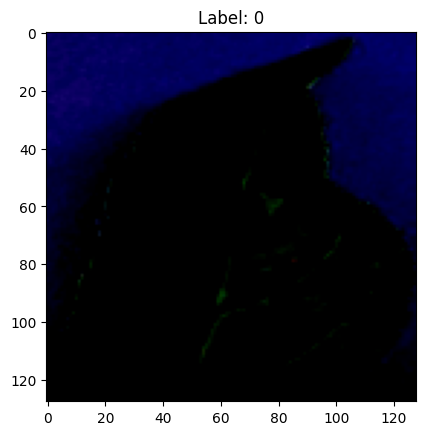

In [23]:
# ==========================================
# 6. Visualization
# ==========================================

# Retrieve a sample (image tensor and label)
# Index 1 is just an example used in the video
image_tensor, label = custom_dataset[1]

print(f"Image Shape: {image_tensor.shape}") # Should be [3, 128, 128]

# To display with matplotlib, we need to change dimensions from [C, H, W] to [H, W, C]
# using .permute(1, 2, 0)
image_to_show = image_tensor.permute(1, 2, 0)

# Display the image
plt.imshow(image_to_show)
plt.title(f"Label: {label}")
plt.show()

# Note: The image might look "distorted" or dark because of the Normalization.
# Matplotlib expects [0, 1] or [0, 255], but our data is [-1, 1].

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

# 1. Split into Train (80%) and Validation (20%)
# We use the 'custom_dataset' created in the previous step
train_size = int(0.8 * len(custom_dataset))
val_size = len(custom_dataset) - train_size

train_subset, val_subset = random_split(custom_dataset, [train_size, val_size])

# 2. Create DataLoaders
# Batch Size 32 means the model looks at 32 images at once before updating its brain.
# Shuffle=True is crucial for training so the model doesn't memorize the order.
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

print(f"Training on {len(train_subset)} images.")
print(f"Validating on {len(val_subset)} images.")

Training on 4258 images.
Validating on 1065 images.


In [26]:
class PlantDiseaseCNN(nn.Module):
    def __init__(self, num_classes):
        super(PlantDiseaseCNN, self).__init__()

        # --- BLOCK 1 ---
        # Input: 3 channels (RGB), Output: 16 feature maps
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Cuts size in half

        # --- BLOCK 2 ---
        # Input: 16, Output: 32
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # --- BLOCK 3 ---
        # Input: 32, Output: 64
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # --- CLASSIFICATION HEAD ---
        # We need to calculate the input size for the Linear layer.
        # Image starts at 128x128.
        # After Pool 1 -> 64x64
        # After Pool 2 -> 32x32
        # After Pool 3 -> 16x16
        # So total features = 64 channels * 16 * 16
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 16 * 16, 128) # Dense layer
        self.fc2 = nn.Linear(128, num_classes)  # Output layer
        self.relu = nn.ReLU()

    def forward(self, x):
        # Pass image through Block 1
        x = self.pool(self.relu(self.conv1(x)))

        # Pass through Block 2
        x = self.pool(self.relu(self.conv2(x)))

        # Pass through Block 3
        x = self.pool(self.relu(self.conv3(x)))

        # Flatten: Turn the 3D cube of features into a 1D line of numbers
        x = self.flatten(x)

        # Classification
        x = self.relu(self.fc1(x))
        x = self.fc2(x) # Final output (Raw scores, no Softmax needed here usually)
        return x

# Instantiate the model
# We use len(new_classes) from your previous steps to set the output size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PlantDiseaseCNN(num_classes=len(new_class_to_idx)).to(device)

print(f"Model created and moved to {device}")

Model created and moved to cpu


In [27]:
# 1. Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # Learning Rate

# 2. Training Function
def train_model(num_epochs):
    for epoch in range(num_epochs):
        model.train() # Set model to training mode
        running_loss = 0.0

        # Loop over the data in batches
        for images, labels in train_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # A. Zero the gradients (Reset)
            optimizer.zero_grad()

            # B. Forward Pass (Predict)
            outputs = model(images)

            # C. Calculate Error (Loss)
            loss = criterion(outputs, labels)

            # D. Backward Pass (Learn)
            loss.backward()  # Calculate how much to change weights
            optimizer.step() # Actually update weights

            running_loss += loss.item()

        # End of Epoch Stats
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# 3. RUN IT!
print("Starting Training...")
train_model(num_epochs=10) # 10 loops through the dataset
print("Training Complete!")

Starting Training...
Epoch [1/10], Loss: 0.7930
Epoch [2/10], Loss: 0.2801
Epoch [3/10], Loss: 0.1637
Epoch [4/10], Loss: 0.1453
Epoch [5/10], Loss: 0.1313
Epoch [6/10], Loss: 0.1331
Epoch [7/10], Loss: 0.0341
Epoch [8/10], Loss: 0.0156
Epoch [9/10], Loss: 0.0198
Epoch [10/10], Loss: 0.0424
Training Complete!


In [28]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # Set model to evaluation mode (The Exam)

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device) # Move images to GPU
            y = y.to(device) # Move labels to GPU

            # Run the model
            scores = model(x)

            # The model outputs raw numbers (logits).
            # We want the index of the highest number.
            # _ is the value (we don't care), predictions is the index
            _, predictions = scores.max(1)

            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    acc = float(num_correct) / float(num_samples) * 100
    print(f"Accuracy: {acc:.2f}%")

    model.train() # Switch back to train mode if you plan to train more

# Run the test
print("Checking accuracy on Validation Set...")
check_accuracy(val_loader, model)

Checking accuracy on Validation Set...
Accuracy: 93.43%


--- Visual Predictions ---


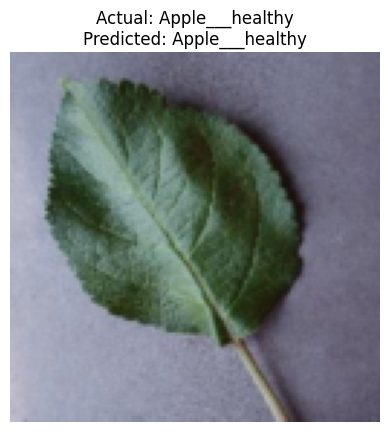

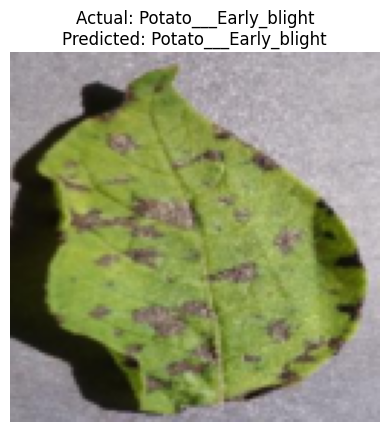

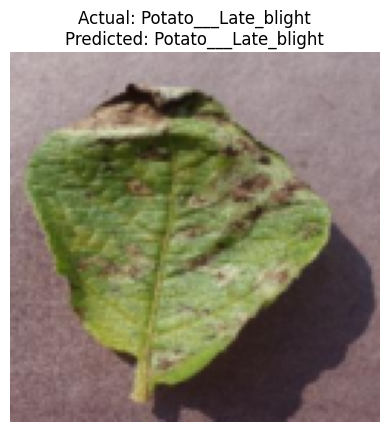

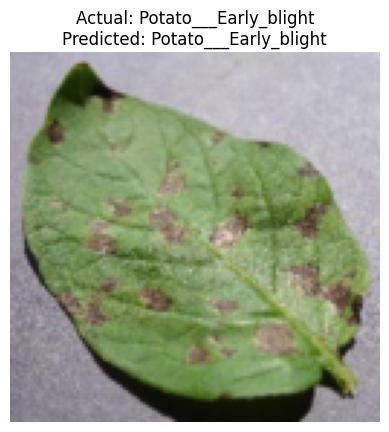

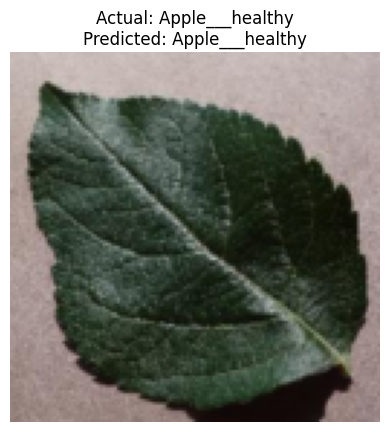

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Create a reverse mapping (Number -> Name)
# new_class_to_idx was {'Apple_Scab': 0, ...}
# We want {0: 'Apple_Scab', ...}
idx_to_class = {v: k for k, v in new_class_to_idx.items()}

# 2. Helper function to un-normalize and display
def imshow(img, title):
    # Un-normalize: back from [-1, 1] to [0, 1]
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # Move Color channel to the back
    plt.title(title)
    plt.axis('off')
    plt.show()

# 3. Get a batch of images
dataiter = iter(val_loader)
images, labels = next(dataiter)

# Move to GPU for prediction
images_gpu = images.to(device)
outputs = model(images_gpu)
_, predicted = torch.max(outputs, 1)

# 4. Show the first 5 images
print("--- Visual Predictions ---")
for i in range(5):
    actual = idx_to_class[labels[i].item()]
    guess = idx_to_class[predicted[i].item()]

    # Color code the title: Green for correct, Red for wrong
    title = f"Actual: {actual}\nPredicted: {guess}"

    imshow(images[i], title)

In [30]:
# Save the model state dictionary (the learned weights)
save_path = "plant_disease_model.pth"
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

# Optional: Download it to your local computer (if using Colab)
from google.colab import files
files.download(save_path)

Model saved to plant_disease_model.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>